<a href="https://colab.research.google.com/github/HarryGN/Heat-transfer-Lab-Code/blob/main/Lab4Curvefitting_Harry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is the code for the lumped capacity model curve-fitting for the heat coefficient for the block without insulation. tested h_ss is not the final value, I will perform h_ss by hand in the doc.
```



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import pandas as pd
import math

In [ ]:
data = pd.read_csv('/content/Lab4.csv',encoding="ISO-8859-1")

print(data)

   T_inf      Beta       v    alpha     k    T_s       h    L     g    Nu_L  \
0     50  0.000005  0.0020  0.00010  0.02  491.8  0.0181  0.5  9.81  0.4527   
1    100  0.000002  0.0025  0.00024  0.05  491.5  0.0204  0.5  9.81  0.2043   
2    150  0.000001  0.0030  0.00036  0.07  491.2  0.0234  0.5  9.81  0.1675   

         Ra_L  
0  13543.9313  
1   1600.2563  
2    387.4042  


In [ ]:
xdata = data[data.columns[9]]
print(xdata)

0    0.4527
1    0.2043
2    0.1675
Name: Nu_L, dtype: float64


In [ ]:
ydata = data[data.columns[10]]
print(ydata)

0    13543.9313
1     1600.2563
2      387.4042
Name: Ra_L, dtype: float64


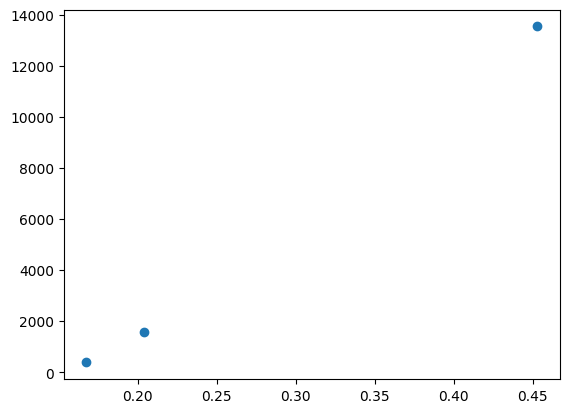

In [ ]:
# Plot the data
plt.scatter(xdata, ydata, label='data')

In [ ]:
def func(Ra, b, a_ln):
    return b*Ra + a_ln

ln_Nu = 0.28714 * ln_Ra + -3.57630


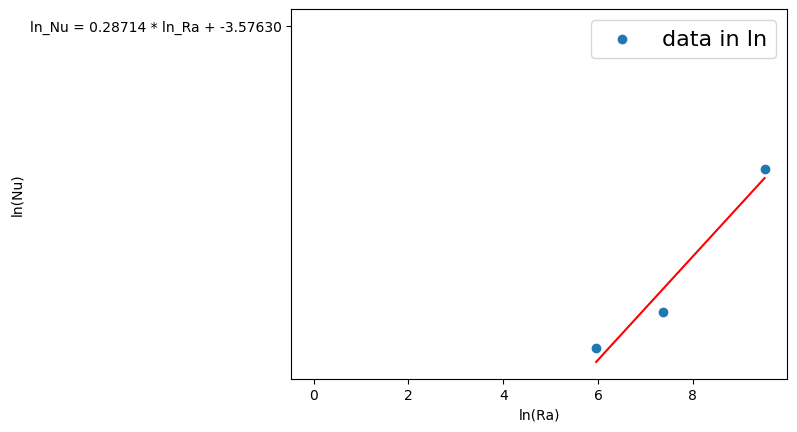

In [ ]:
Nu = np.log(xdata)
Ra =np.log(ydata)
# Plot the data
plt.scatter(Ra, Nu, label='data in ln')


# Fit for the parameters h of the function func:
popt, pcov = curve_fit(func, Ra, Nu)

b, a_ln = popt
plt.plot(Ra, func (Ra,*popt), 'r-',)
print('ln_Nu = %.5f * ln_Ra + %.5f' % (b, a_ln))

# '''
# Constrain the fitting to the region of 0 <= h <= 50:
# '''

# popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, 50. ))
# popt

plt.xlabel('ln(Ra)')
plt.ylabel('ln(Nu)')
plt.legend(fontsize= 16)

In [ ]:

%%shell
jupyter nbconvert --to html /content/Lab4Curvefitting_Harry.ipynb

[NbConvertApp] Converting notebook /content/Lab4Curvefitting_Harry.ipynb to html
[NbConvertApp] Writing 646342 bytes to /content/Lab4Curvefitting_Harry.html
